#    Data Description 
https://www.kaggle.com/c/predict-west-nile-virus/data

    In this competition, you will be analyzing weather data and GIS data and predicting whether or not West Nile virus is present, for a given time, location, and species. 

    Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for the presence of West Nile virus before the end of the week. The test results include the number of mosquitos, the mosquitos species, and whether or not West Nile virus is present in the cohort. 

#    Main dataset

    These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. 

    The location of the traps are described by the block number and street name. For your convenience, we have mapped these attributes into Longitude and Latitude in the dataset. Please note that these are derived locations. For example, Block=79, and Street= "W FOSTER AVE" gives us an approximate address of "7900 W FOSTER AVE, Chicago, IL", which translates to (41.974089,-87.824812) on the map.

    Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are postfixed with letters. For example, T220A is a satellite trap to T220. 

    Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitos is found at a certain trap at a certain time. In the test set, we ask you for all combinations/permutations of possible predictions and are only scoring the observed ones.
    
    
#    File descriptions
    train.csv, test.csv - the training and test set of the main dataset. The training set consists of data from 2007, 2009, 2011, and 2013, while in the test set you are requested to predict the test results for 2008, 2010, 2012, and 2014.
    
    Id: the id of the record
    Date: date that the WNV test is performed
    Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
    Species: the species of mosquitos
    Block: block number of address
    Street: street name
    Trap: Id of the trap
    AddressNumberAndStreet: approximate address returned from GeoCoder
    Latitude, Longitude: Latitude and Longitude returned from GeoCoder
    AddressAccuracy: accuracy returned from GeoCoder
    NumMosquitos: number of mosquitoes caught in this trap
    WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

In [34]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns=None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [17]:
df=pd.read_csv("train.csv",index_col=["Date"],parse_dates=["Date"])
df.head(20)

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0


In [29]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.month for d in df.index]

In [30]:
df.shape

(10506, 13)

# Basic Analysis

In [31]:
df.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [32]:
df.columns

Index(['Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'year', 'month'],
      dtype='object')

In [133]:
df.groupby(by="Species")["NumMosquitos"].sum()

Species
CULEX ERRATICUS               7
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
CULEX RESTUANS            23431
CULEX SALINARIUS            145
CULEX TARSALIS                7
CULEX TERRITANS             510
Name: NumMosquitos, dtype: int64

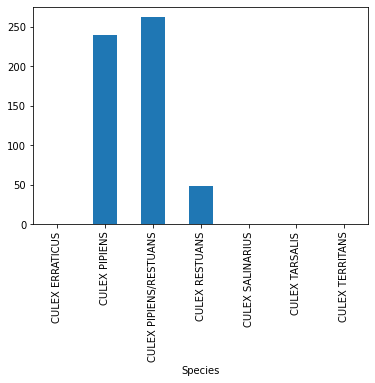

In [131]:
df.groupby(by="Species")["WnvPresent"].sum().plot(kind="bar")

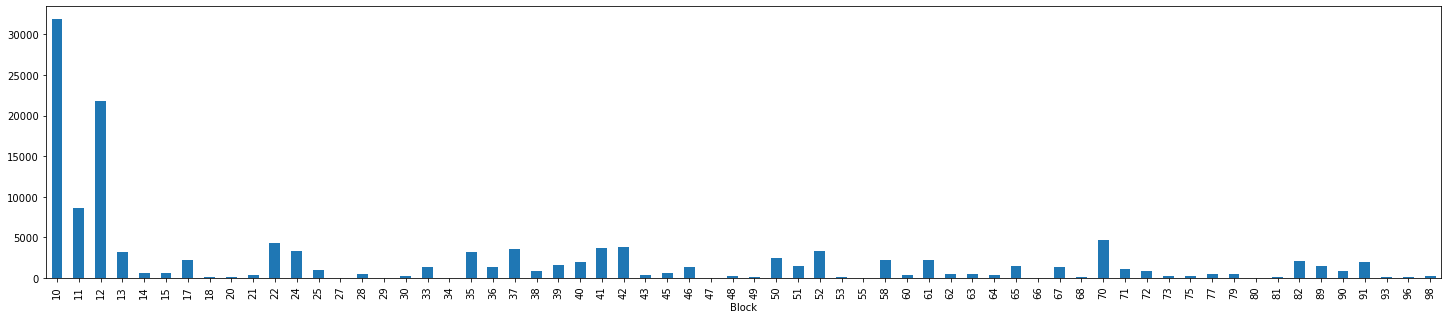

In [128]:
df.groupby(by="Block")["NumMosquitos"].sum().plot(kind="bar",figsize=(25,5))

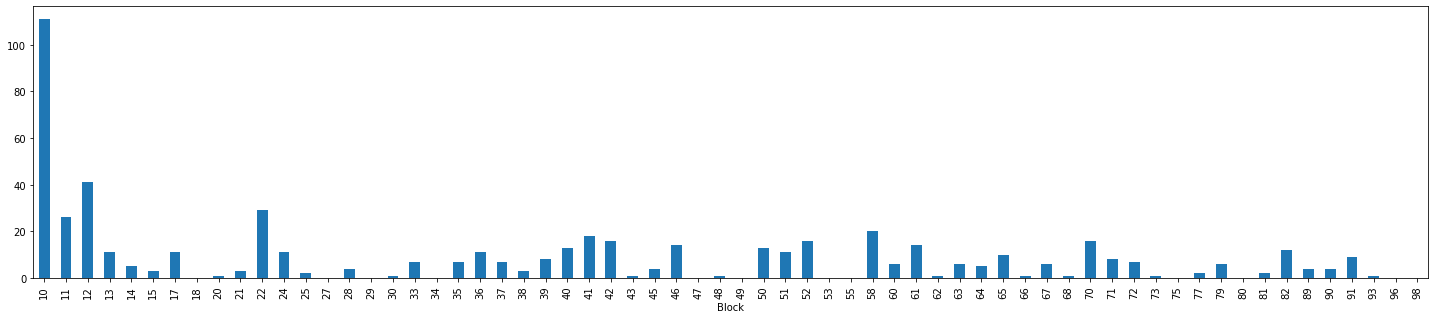

In [127]:
df.groupby(by="Block")["WnvPresent"].sum().plot(kind="bar",figsize=(25,5))

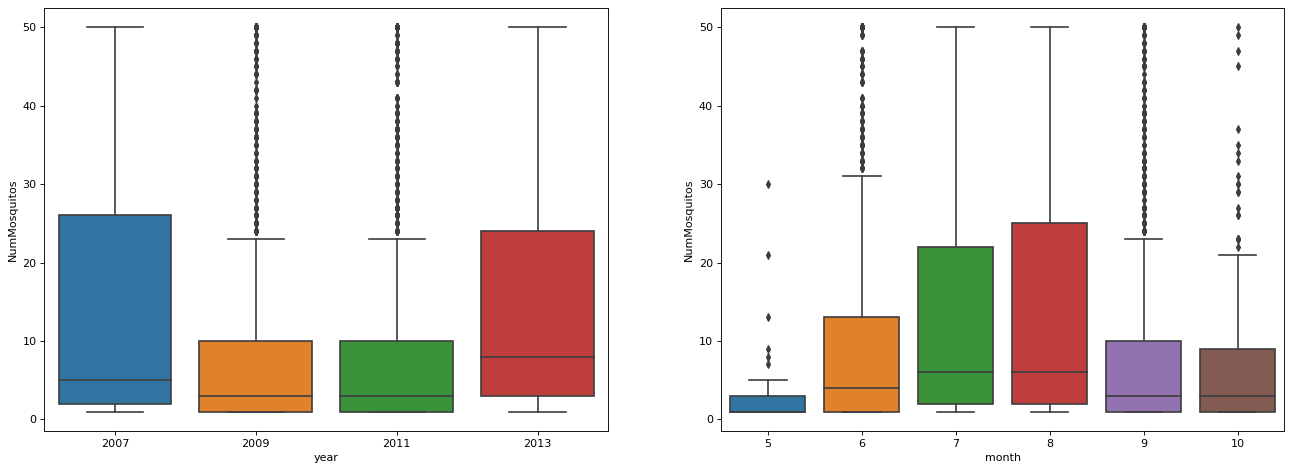

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='NumMosquitos', data=df, ax=axes[0])
sns.boxplot(x='month', y='NumMosquitos', data=df,ax=axes[1])

# Spread Mosquitoes

In [44]:
df.dropna(inplace=True)

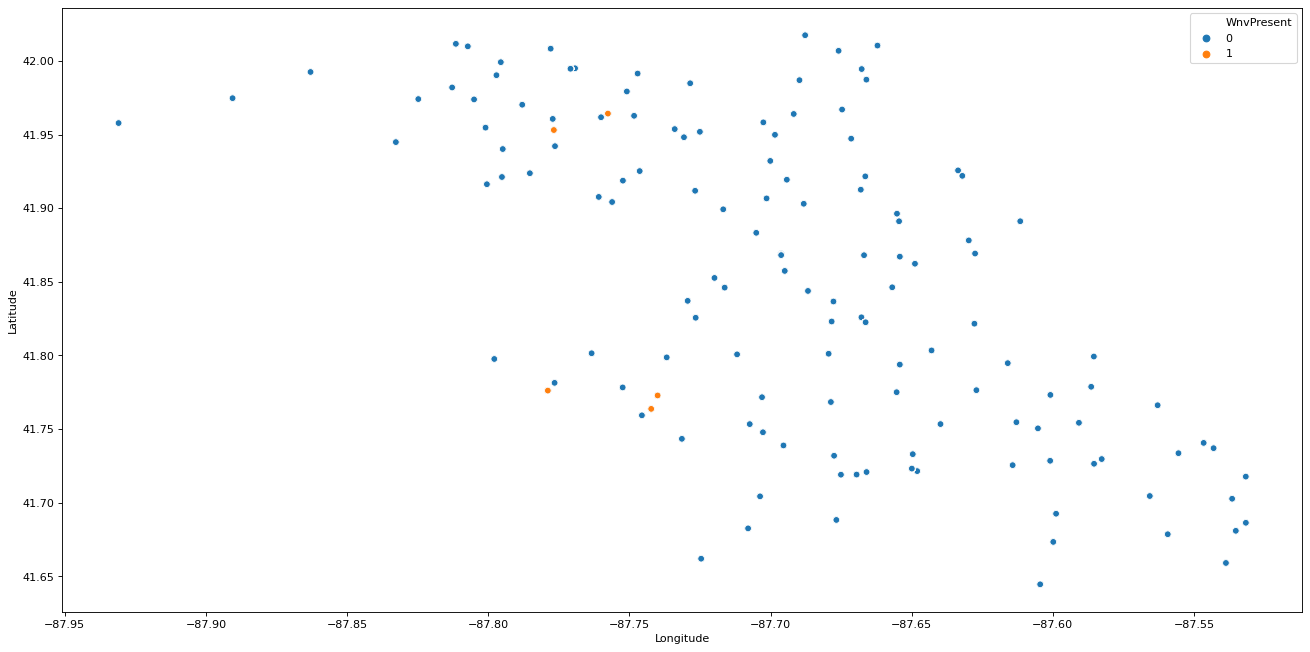

In [104]:
fig, axes = plt.subplots(1, figsize=(20,10), dpi= 80)
sns.scatterplot(x="Longitude",y="Latitude",hue="WnvPresent",data=df)
plt.show()

# Bar Plots

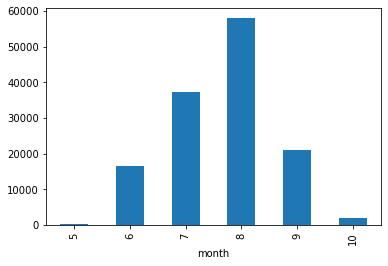

In [113]:
df.groupby(by="month")["NumMosquitos"].sum().plot(kind="bar")

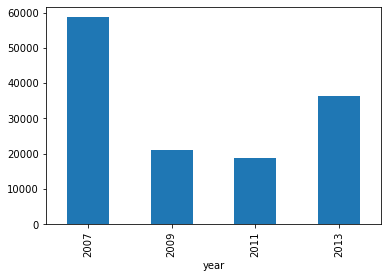

In [130]:
df.groupby(by="year")["NumMosquitos"].sum().plot(kind="bar")

# Conclusion : 
### As Compared to 2007 the Number of  mosquito in 2009-11-13 is less.
### Number of mosquito found in month 6-9 is high as compared to month 5th and 10th .ie.High Growth between  between(6-9 month)
### West Nile Virus was present in PIPIENS and RESTUANS, mosquitos.
### A mosquito of a genus(CULEX) which includes a number of kinds commonly found in cooler regions. 
### Maximum mosquitos which contain West Nile Virus was present Block 10,11,12 

### Temperature is less the production of mosquito is more. 
### Distribution of Heat in the month of 6-7-8 is quite low . That is a favorable condition for mosquito production. 
### From 2007 to 2009 -> sudden change in Av.cool (ie.Temprature). May be this is reason the Number of mosquito in 2009 is quite low as compared to 2007 
### In 2011, even the (Avg)cool temperature is high as compared to 2009 still due to may be Anti-mosquito spray the count of mosquito got reduce.

###  Wind Effect As compare to month 5 and 10 , months 6-9 has low AvgSpeed(wind) which is favorable for the growth of mosquitoes.
### DewPoint also plays an important role in the growth of mosquitoes. Due Avg. DewPoint of months 6-9 is high as compared to 5-6 which is directly proportional to the growth of mosquitoes.
### Anti-mosquito spray used only in the months 7-8 and 9 (2011 & 13).
### The effect of Anti-mosquito spray we can clearly see the count of mosquito
### The count of mosquito in 2013 is increased that's why may be the increased area and frequency of Anti-mosquito spray.